# Class comparison

## Setup

In [1]:
import util.local_config as local_config
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from util.helper_functions.classification_report_output_processon import print_classification_report

In [2]:
# Get the ground truth labels
ground_truth_labels = local_config.GROUND_TRUTH_LABELS

# Get the speech and text model results dataframes
speech_model_results = local_config.SPEECH_MODEL_RESULTS
text_model_results = local_config.TEXT_MODEL_RESULTS

# Merge the ground truth labels with the speech model results
speech_model_results = pd.merge(speech_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

# Merge the ground truth labels with the text model results
text_model_results = pd.merge(text_model_results, ground_truth_labels, on=['dialogue_id', 'utterance_id'])

## Main

### Confusion matrices

In [3]:
# Calculate the confusion matrix for the text model
text_confusion_matrix = confusion_matrix(text_model_results['ground_truth_emotion_one_hot_index'], text_model_results['model_prediction'])

# Calculate the confusion matrix for the speech model
speech_confusion_matrix = confusion_matrix(speech_model_results['ground_truth_emotion_one_hot_index'], speech_model_results['model_prediction'])

#### Text model confusion matrix

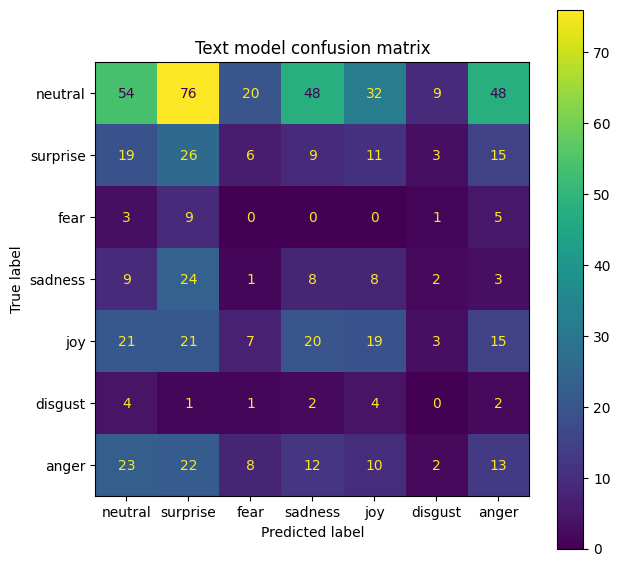

In [4]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Text model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=text_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

#### Speech model confusion matrix

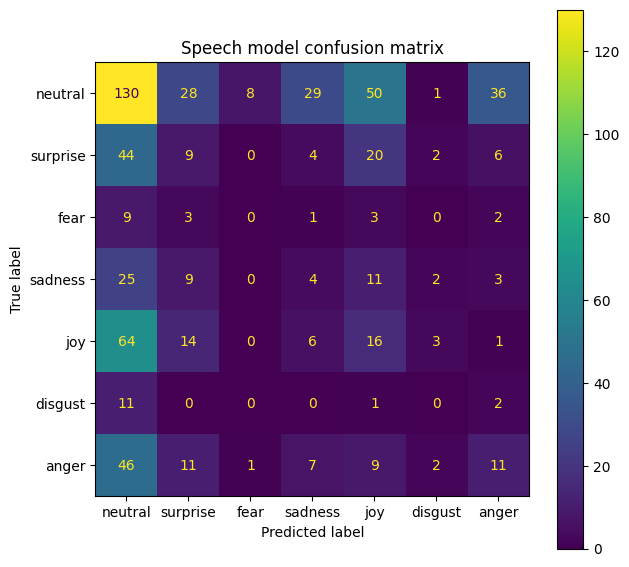

In [5]:
# Set the figure
fig, ax = plt.subplots(figsize=(7, 7))

# Set the title
ax.set_title('Speech model confusion matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Show the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=speech_confusion_matrix, 
    display_labels=local_config.EMOTION_LABELS_STRINGS
).plot(ax=ax)

plt.show()

### Classification reports

#### Text model

In [6]:
text_classification_report = classification_report(
    y_true=text_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=text_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [7]:
# Print the classification report
print_classification_report(text_classification_report)

Neutral
------------------------------------
precision: 0.40601503759398494
recall: 0.18815331010452963
f1-score: 0.2571428571428572
support: 287

Surprise:
------------------------------------
precision: 0.1452513966480447
recall: 0.29213483146067415
f1-score: 0.1940298507462687
support: 89

Fear:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 18

Sadness:
------------------------------------
precision: 0.08080808080808081
recall: 0.14545454545454545
f1-score: 0.1038961038961039
support: 55

Joy:
------------------------------------
precision: 0.2261904761904762
recall: 0.1792452830188679
f1-score: 0.2
support: 106

Disgust:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 14

Anger:
------------------------------------
precision: 0.12871287128712872
recall: 0.14444444444444443
f1-score: 0.13612565445026178
support: 90



#### Speech model

In [8]:
speech_classification_report = classification_report(
    y_true=speech_model_results['ground_truth_emotion_one_hot_index'], 
    y_pred=speech_model_results['model_prediction'], 
    target_names=local_config.EMOTION_LABELS_STRINGS, 
    output_dict=True,
    zero_division=0
)

In [9]:
# Print the classification report
print_classification_report(speech_classification_report)

Neutral
------------------------------------
precision: 0.3951367781155015
recall: 0.46099290780141844
f1-score: 0.425531914893617
support: 282

Surprise:
------------------------------------
precision: 0.12162162162162163
recall: 0.10588235294117647
f1-score: 0.11320754716981132
support: 85

Fear:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 18

Sadness:
------------------------------------
precision: 0.0784313725490196
recall: 0.07407407407407407
f1-score: 0.0761904761904762
support: 54

Joy:
------------------------------------
precision: 0.14545454545454545
recall: 0.15384615384615385
f1-score: 0.14953271028037382
support: 104

Disgust:
------------------------------------
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 14

Anger:
------------------------------------
precision: 0.18032786885245902
recall: 0.12643678160919541
f1-score: 0.14864864864864866
support: 87

